In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

In [2]:
linear_model = ctypes.CDLL("modele/linear/target/release/liblinear_classification.so")

linear_model.LM_init.argtypes = [
    ctypes.c_double,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_double,
    ctypes.c_char
]
linear_model.LM_init.restype = ctypes.POINTER(ctypes.c_void_p)

linear_model.LM_free.argtypes = [ctypes.POINTER(ctypes.c_void_p)]

linear_model.LM_train.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    ctypes.c_size_t
]

linear_model.LM_predict.argtypes = [
    ctypes.POINTER(ctypes.c_void_p),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS'),
    ctypes.c_size_t,
    ctypes.c_size_t,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags='C_CONTIGUOUS')
]

## Xor test

### Parameters

In [3]:
learning_rate = 0.01
weights = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float64, order='C')
bias = 0.5
epochs = 1000000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

flatten vector [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


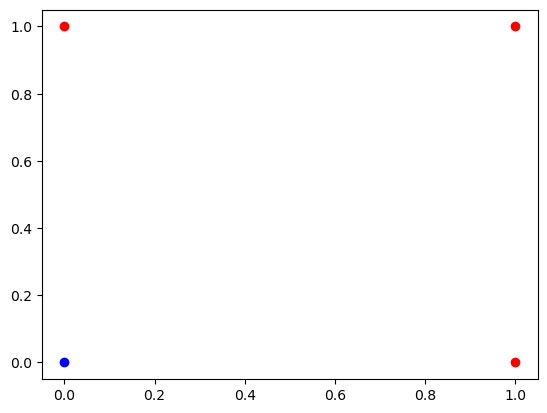

<Figure size 640x480 with 0 Axes>

In [4]:
# XOR test

x_train = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([-1.0, 1.0, 1.0, -1.0], dtype=np.float64, order='C')
n_samples, n_features = 3, 2

print(f"flatten vector {x_train}")
plt.scatter(x_train[0, 0], x_train[0, 1], color='blue')
plt.scatter(x_train[1:4,0], x_train[1:4,1], color='red')
plt.show()
plt.clf()

In [5]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

Epoch 0 completed
Epoch 100 completed
Epoch 200 completed
Epoch 300 completed
Epoch 400 completed
Epoch 500 completed
Epoch 600 completed
Epoch 700 completed
Epoch 800 completed
Epoch 900 completed
Epoch 1000 completed
Epoch 1100 completed
Epoch 1200 completed
Epoch 1300 completed
Epoch 1400 completed
Epoch 1500 completed
Epoch 1600 completed
Epoch 1700 completed
Epoch 1800 completed
Epoch 1900 completed
Epoch 2000 completed
Epoch 2100 completed
Epoch 2200 completed
Epoch 2300 completed
Epoch 2400 completed
Epoch 2500 completed
Epoch 2600 completed
Epoch 2700 completed
Epoch 2800 completed
Epoch 2900 completed
Epoch 3000 completed
Epoch 3100 completed
Epoch 3200 completed
Epoch 3300 completed
Epoch 3400 completed
Epoch 3500 completed
Epoch 3600 completed
Epoch 3700 completed
Epoch 3800 completed
Epoch 3900 completed
Epoch 4000 completed
Epoch 4100 completed
Epoch 4200 completed
Epoch 4300 completed
Epoch 4400 completed
Epoch 4500 completed
Epoch 4600 completed
Epoch 4700 completed
Epoc

0

In [6]:
n_samples_new = x_train.shape[0]
predictions = np.zeros(n_samples_new, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples_new,
    n_features,
    predictions
)

print(predictions)

[-0.99974982  0.99989993  0.99989993  1.        ]


In [7]:
linear_model.LM_free(model)

0

## simple linear test

In [8]:
learning_rate = 0.01
weights = np.array([0.1, -0.2, 0.3, -0.4], dtype=np.float64, order='C')
bias = 0.5
epochs = 1000000
activation = b't'
# Initialisation du modèle
model = linear_model.LM_init(learning_rate, weights, weights.size, bias, activation)

flatten vector [[1. 1.]
 [2. 3.]
 [3. 3.]]


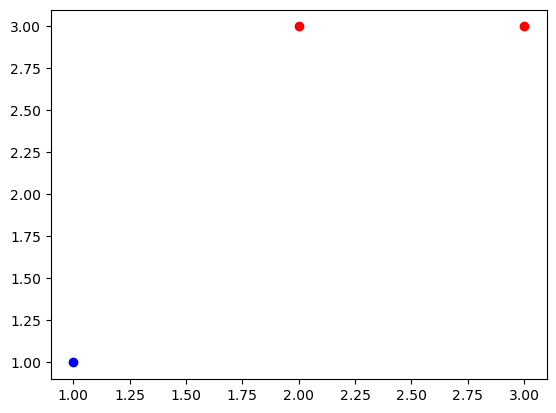

<Figure size 640x480 with 0 Axes>

In [9]:
x_train = np.array([
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0]
], dtype=np.float64)
x_train_flatten = x_train.flatten()
y_train = np.array([1.0, -1.0, -1.0], dtype=np.float64, order='C')
n_samples, n_features = 3, 2

print(f"flatten vector {x_train}")
plt.scatter(x_train[0, 0], x_train[0, 1], color='blue')
plt.scatter(x_train[1:4,0], x_train[1:4,1], color='red')
plt.show()
plt.clf()

In [10]:
linear_model.LM_train(model, x_train_flatten, y_train, n_samples, n_features, epochs)

Epoch 0 completed
Epoch 100 completed
Epoch 200 completed
Epoch 300 completed
Epoch 400 completed
Epoch 500 completed
Epoch 600 completed
Epoch 700 completed
Epoch 800 completed
Epoch 900 completed
Epoch 1000 completed
Epoch 1100 completed
Epoch 1200 completed
Epoch 1300 completed
Epoch 1400 completed
Epoch 1500 completed
Epoch 1600 completed
Epoch 1700 completed
Epoch 1800 completed
Epoch 1900 completed
Epoch 2000 completed
Epoch 2100 completed
Epoch 2200 completed
Epoch 2300 completed
Epoch 2400 completed
Epoch 2500 completed
Epoch 2600 completed
Epoch 2700 completed
Epoch 2800 completed
Epoch 2900 completed
Epoch 3000 completed
Epoch 3100 completed
Epoch 3200 completed
Epoch 3300 completed
Epoch 3400 completed
Epoch 3500 completed
Epoch 3600 completed
Epoch 3700 completed
Epoch 3800 completed
Epoch 3900 completed
Epoch 4000 completed
Epoch 4100 completed
Epoch 4200 completed
Epoch 4300 completed
Epoch 4400 completed
Epoch 4500 completed
Epoch 4600 completed
Epoch 4700 completed
Epoc

0

In [11]:
n_samples_new = x_train.shape[0]
predictions = np.zeros(n_samples_new, dtype=np.float64)

linear_model.LM_predict(
    model,
    x_train_flatten,
    n_samples_new,
    n_features,
    predictions
)

print(predictions)

Epoch 913900 completed
Epoch 914000 completed
Epoch 914100 completed
Epoch 914200 completed
Epoch 914300 completed
Epoch 914400 completed
Epoch 914500 completed
Epoch 914600 completed
Epoch 914700 completed
Epoch 914800 completed
Epoch 914900 completed
Epoch 915000 completed
Epoch 915100 completed
Epoch 915200 completed
Epoch 915300 completed
Epoch 915400 completed
Epoch 915500 completed
Epoch 915600 completed
Epoch 915700 completed
Epoch 915800 completed
Epoch 915900 completed
Epoch 916000 completed
Epoch 916100 completed
Epoch 916200 completed
Epoch 916300 completed
Epoch 916400 completed
Epoch 916500 completed
Epoch 916600 completed
Epoch 916700 completed
Epoch 916800 completed
Epoch 916900 completed
Epoch 917000 completed
Epoch 917100 completed
Epoch 917200 completed
Epoch 917300 completed
Epoch 917400 completed
Epoch 917500 completed
Epoch 917600 completed
Epoch 917700 completed
Epoch 917800 completed
Epoch 917900 completed
Epoch 918000 completed
Epoch 918100 completed
Epoch 91820

In [12]:
linear_model.LM_free(model)

0